In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Marcy_Student/Desktop/Food Insecurity Analysis/datasets/cleaned_for_eda/cleaned_neighborhood_prioritization_eda.csv')

In [3]:
df.head()

,nta_id,nta_name,borough,food_insecure_percentage,food_insecure_percentage_rank,unemployment_rate,unemployment_rate_rank,vulnerable_population_percentage,vulnerable_population_percentage_rank,supply_gap,weighted_score,latitude_generated,latitude_generated.1
0,BK0104,East Williamsburg,Brooklyn,35.99,1,6.38,126,12.43,146,2.776626e+06,8.2210,40.714789,40.714789
1,BX0501,University Heights (South)-Morris Heights,Bronx,29.44,14,11.98,20,19.63,34,1.669389e+06,8.0704,40.850930,40.850930
2,BX0901,Soundview-Bruckner-Bronx River,Bronx,22.63,36,10.06,32,21.43,25,1.625976e+06,7.6866,40.830599,40.830599
3,MN1202,Washington Heights (North),Manhattan,24.29,28,12.25,19,18.57,41,1.463457e+06,7.3895,40.857729,40.857729
4,BK1503,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,Brooklyn,21.11,42,4.91,170,15.95,81,1.907056e+06,7.2775,40.587225,40.587225


<Axes: xlabel='borough'>

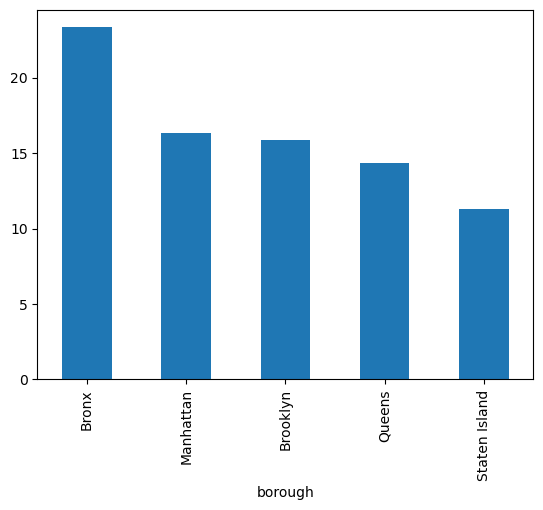

In [31]:
df.groupby('borough')['food_insecure_percentage'].mean().sort_values(ascending=False).plot(kind='bar')

In [4]:
# print the info of the dataframe to understand the data types and check for missing values
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   nta_id                                 197 non-null    object 
 1   nta_name                               197 non-null    object 
 2   borough                                197 non-null    object 
 3   food_insecure_percentage               197 non-null    float64
 4   food_insecure_percentage_rank          197 non-null    int64  
 5   unemployment_rate                      197 non-null    float64
 6   unemployment_rate_rank                 197 non-null    int64  
 7   vulnerable_population_percentage       197 non-null    float64
 8   vulnerable_population_percentage_rank  197 non-null    int64  
 9   supply_gap                             197 non-null    float64
 10  weighted_score                         197 non-null    float64
 11  latitu

nta_id                                   0
nta_name                                 0
borough                                  0
food_insecure_percentage                 0
food_insecure_percentage_rank            0
unemployment_rate                        0
unemployment_rate_rank                   0
vulnerable_population_percentage         0
vulnerable_population_percentage_rank    0
supply_gap                               0
weighted_score                           0
latitude_generated                       0
latitude_generated.1                     0
dtype: int64
0


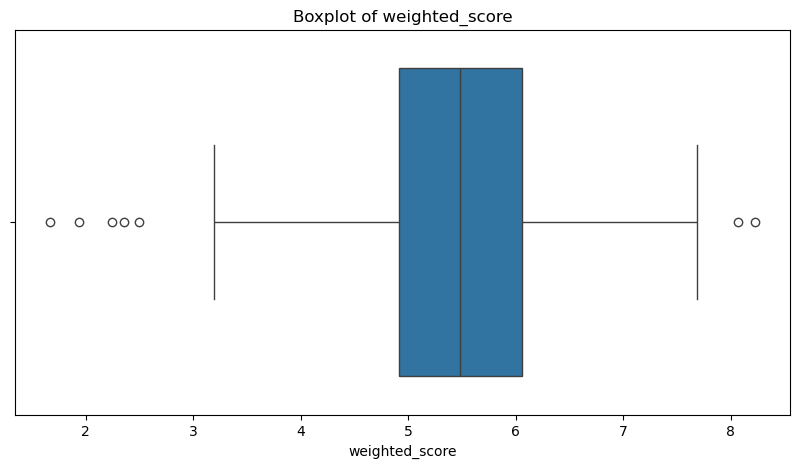

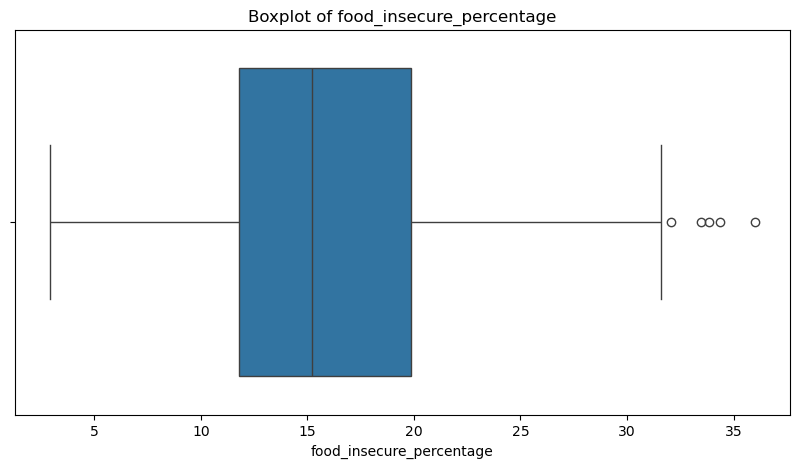

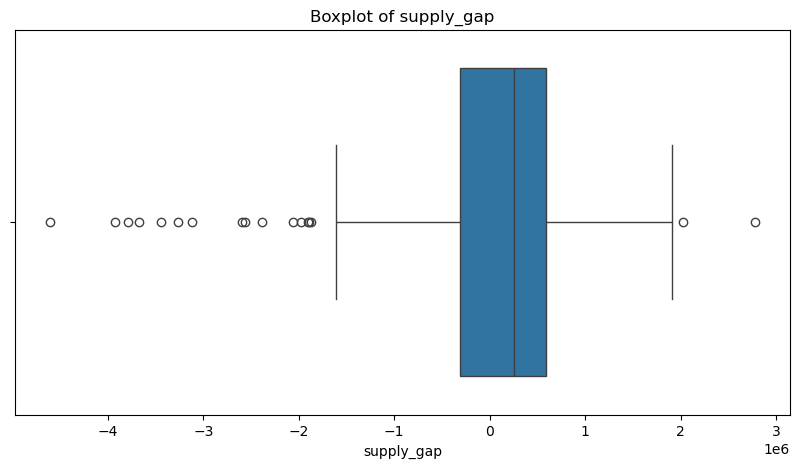

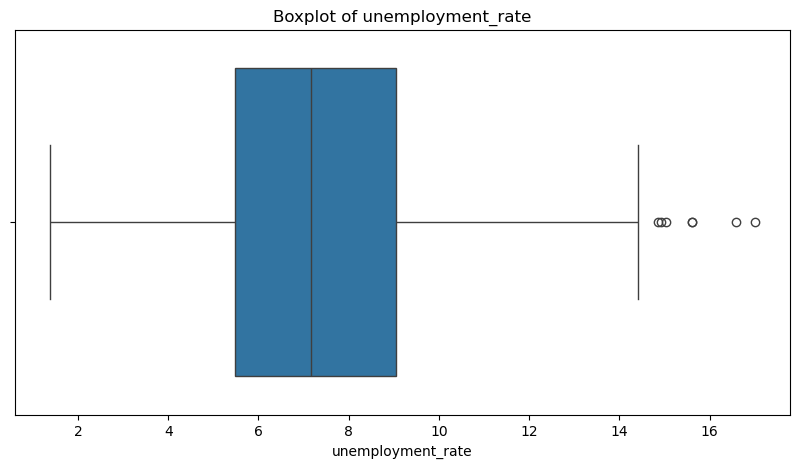

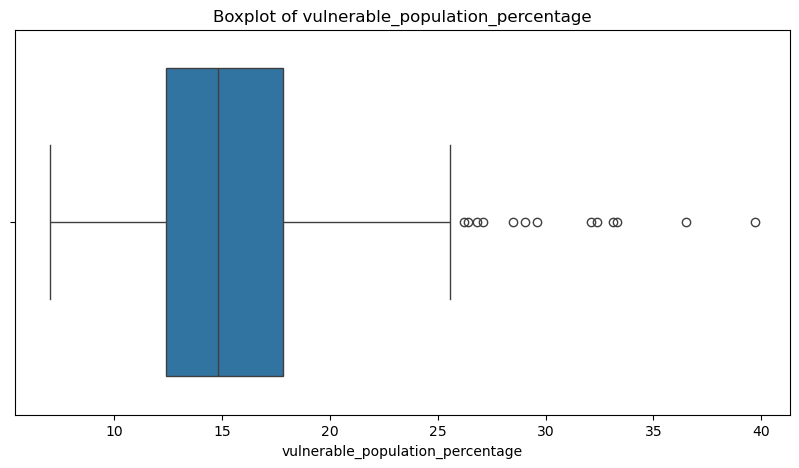

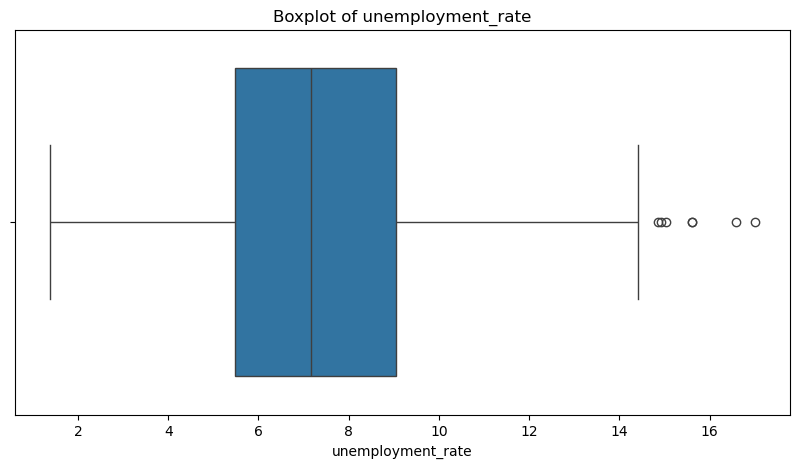

In [5]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print(df.duplicated().sum())
# Check for outliers using boxplots
numeric_columns = ['weighted_score', 'food_insecure_percentage', 'supply_gap', 'unemployment_rate', 'vulnerable_population_percentage', 'unemployment_rate' ]
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [6]:
# write the summary statistics of the numeric columns
df[numeric_columns].describe()

,weighted_score,food_insecure_percentage,supply_gap,unemployment_rate,vulnerable_population_percentage,unemployment_rate
count,197.000000,197.000000,1.970000e+02,197.000000,197.000000,197.000000
mean,5.414561,16.519289,-1.976900e+04,7.682386,15.842386,7.682386
std,1.021824,6.620541,1.100397e+06,2.977905,5.602104,2.977905
min,1.667900,2.920000,-4.606012e+06,1.380000,7.040000,1.380000
25%,4.911100,11.790000,-3.097622e+05,5.470000,12.390000,5.470000
50%,5.478200,15.210000,2.561395e+05,7.170000,14.810000,7.170000
75%,6.058400,19.880000,5.894113e+05,9.060000,17.840000,9.060000
max,8.221000,35.990000,2.776626e+06,17.000000,39.690000,17.000000


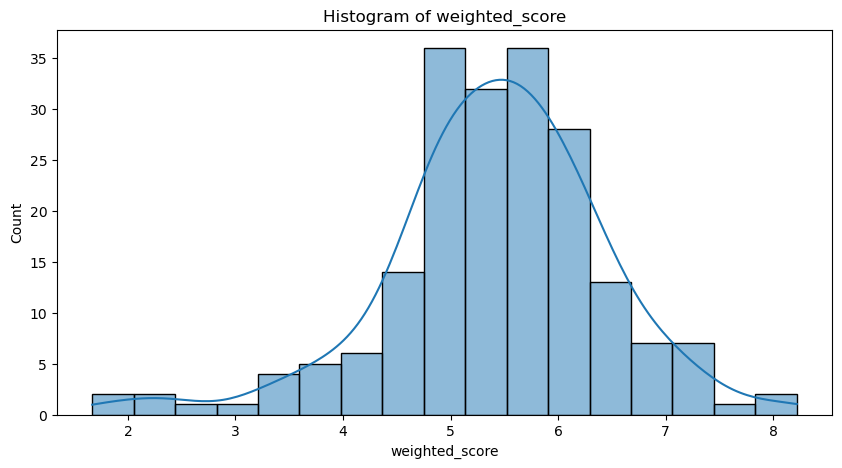

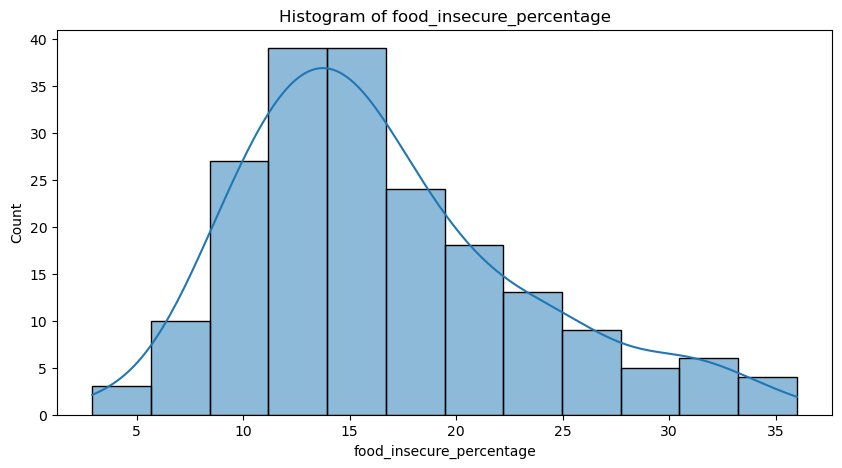

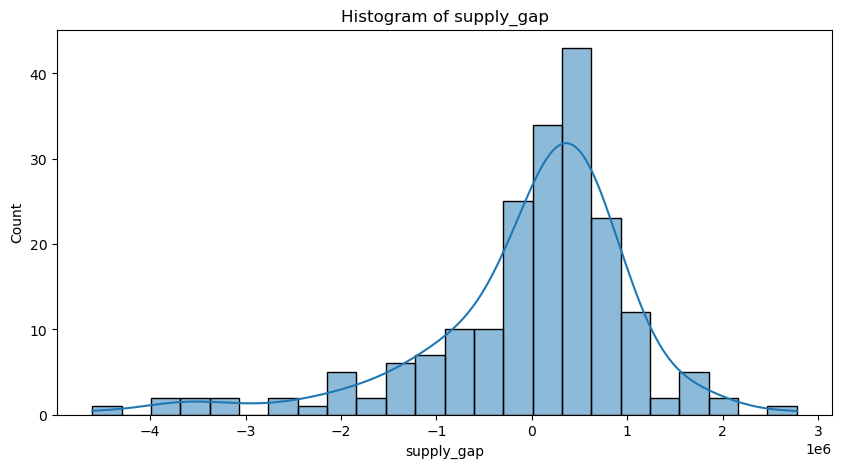

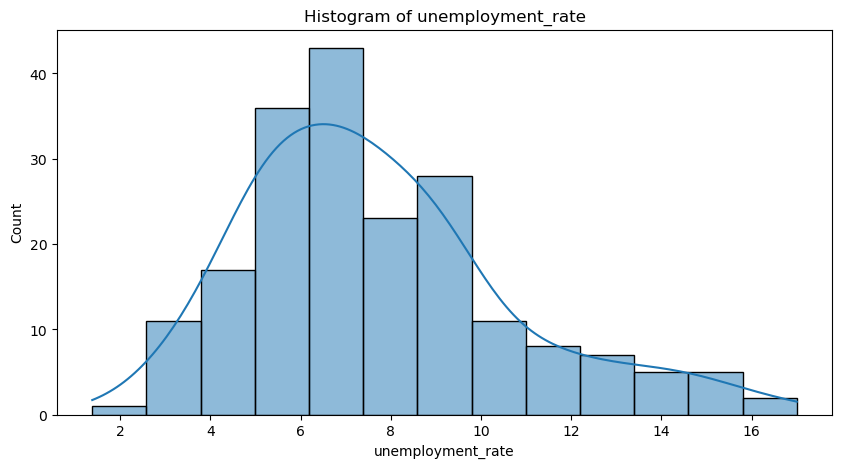

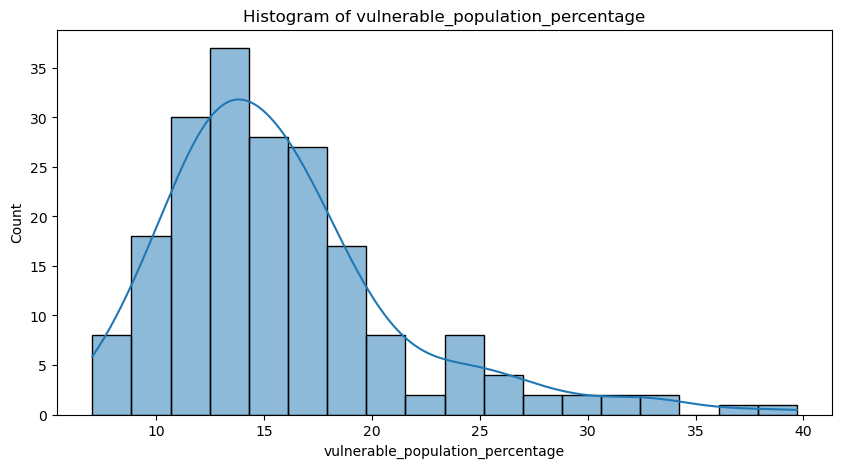

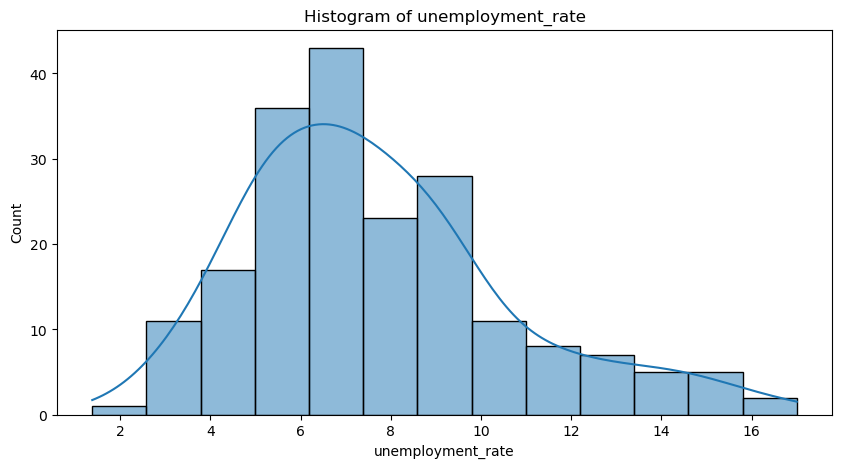

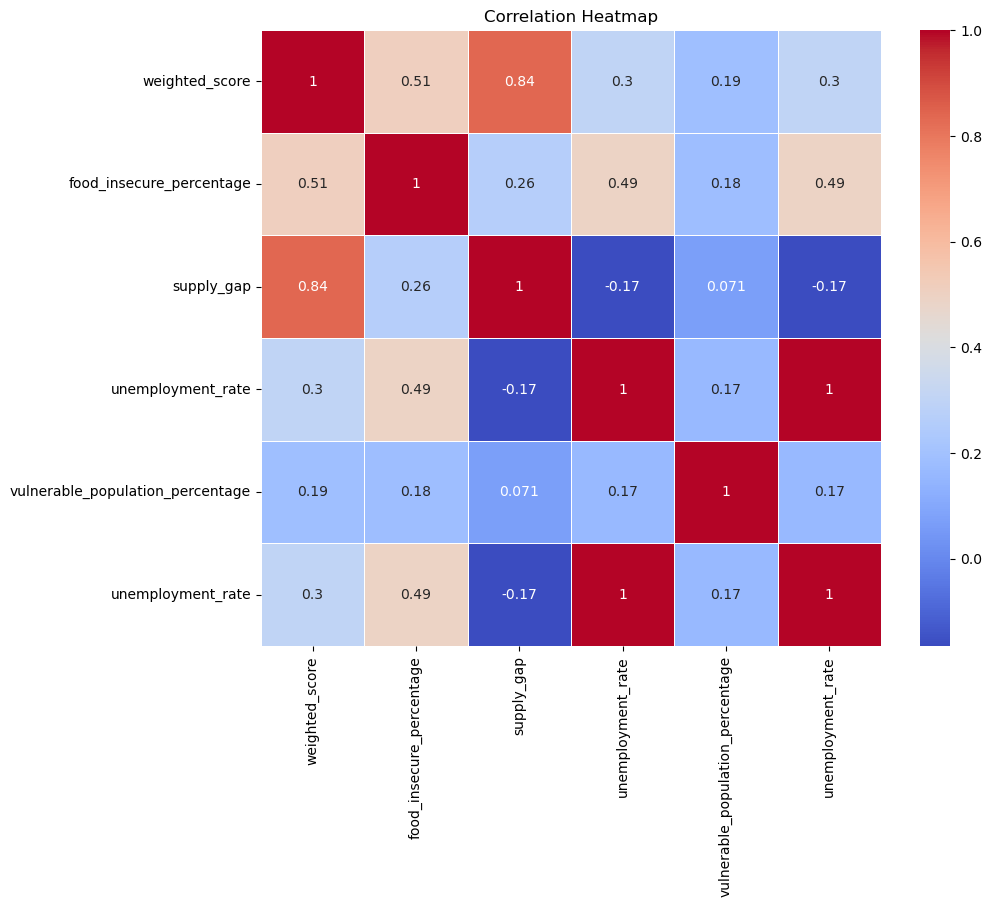

In [7]:
# Let's check the distribution of the data using histograms
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# Next, let's check the correlation between the numeric variables using a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.head()

,nta_id,nta_name,borough,food_insecure_percentage,food_insecure_percentage_rank,unemployment_rate,unemployment_rate_rank,vulnerable_population_percentage,vulnerable_population_percentage_rank,supply_gap,weighted_score,latitude_generated,latitude_generated.1
0,BK0104,East Williamsburg,Brooklyn,35.99,1,6.38,126,12.43,146,2.776626e+06,8.2210,40.714789,40.714789
1,BX0501,University Heights (South)-Morris Heights,Bronx,29.44,14,11.98,20,19.63,34,1.669389e+06,8.0704,40.850930,40.850930
2,BX0901,Soundview-Bruckner-Bronx River,Bronx,22.63,36,10.06,32,21.43,25,1.625976e+06,7.6866,40.830599,40.830599
3,MN1202,Washington Heights (North),Manhattan,24.29,28,12.25,19,18.57,41,1.463457e+06,7.3895,40.857729,40.857729
4,BK1503,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,Brooklyn,21.11,42,4.91,170,15.95,81,1.907056e+06,7.2775,40.587225,40.587225


In [9]:
# Neighborhood Food Insecurity Analysis

neighborhood_stats = df.groupby('borough').agg({
    'nta_id': 'count',
    'food_insecure_percentage': ['mean', 'min', 'max', 'std'],
    'unemployment_rate': ['mean', 'min', 'max'],
    'vulnerable_population_percentage': ['mean', 'min', 'max'],
    'supply_gap': ['mean', 'min', 'max']
}).round(2)

In [10]:
neighborhood_stats

nta_id food_insecure_percentage                      \
               count                     mean    min    max   std   
borough                                                             
Bronx             37                    23.32  10.97  34.35  6.50   
Brooklyn          53                    15.87   7.51  35.99  5.21   
Manhattan         32                    16.30   8.11  33.46  5.75   
Queens            59                    14.37   2.92  31.09  5.74   
Staten Island     16                    11.32   6.00  23.78  4.34   

              unemployment_rate              vulnerable_population_percentage  \
                           mean   min    max                             mean   
borough                                                                         
Bronx                     11.24  5.62  17.00                            16.82   
Brooklyn                   7.28  3.36  14.85                            15.06   
Manhattan                  6.66  2.60  13.60                            13.82   
Queens                     6.92  3.18  15.62                            18.33   
Staten Island              5.64  1.38   8.91                            11.06   

                           supply_gap                          
                min    max       mean         min         max  
borough                                                        
Bronx          9.17  26.83  146958.75 -2560586.09  2022029.14  
Brooklyn       7.70  33.29 -215125.63 -4606011.51  2776626.10  
Manhattan      9.65  19.32  323628.17 -1608497.99  1463457.02  
Queens         7.59  39.69 -172473.03 -3923144.64  1730635.82  
Staten Island  7.04  16.05  118093.64 -1977610.23  1075153.92

In [11]:
# Top 10 most food insecure neighborhoods
top_insecure = df.nsmallest(10, 'food_insecure_percentage_rank')[
    ['nta_name', 'borough', 'food_insecure_percentage', 'unemployment_rate', 'vulnerable_population_percentage']
]

In [12]:
top_insecure

,nta_name,borough,food_insecure_percentage,unemployment_rate,vulnerable_population_percentage
0,East Williamsburg,Brooklyn,35.99,6.38,12.43
7,West Farms,Bronx,34.35,16.58,16.67
11,Belmont,Bronx,33.87,15.03,22.36
80,Midtown-Times Square,Manhattan,33.46,5.77,15.68
16,Highbridge,Bronx,32.07,9.79,15.18
28,Claremont Village-Claremont (East),Bronx,31.58,14.92,12.72
10,Mott Haven-Port Morris,Bronx,31.43,13.11,15.27
51,Tremont,Bronx,31.25,12.47,16.40
85,Glen Oaks-Floral Park-New Hyde Park,Queens,31.09,4.19,13.63
101,Queensboro Hill,Queens,30.92,5.16,28.48


posx and posy should be finite values
posx and posy should be finite values


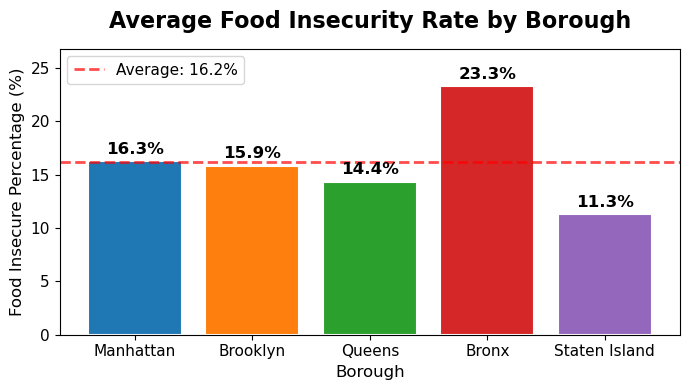

In [13]:
# Average Food Insecurity Rate by Borough
fig1, ax2 = plt.subplots(figsize=(7, 4))
borough_order = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island', 'Unknown']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
# compute mean food insecurity per borough and align with borough_order
food_insec_mean = df.groupby('borough')['food_insecure_percentage'].mean().reindex(borough_order)
# for plotting, replace NaN with 0 so bars render (we'll label missing values as 'N/A')
#food_insec_plot = food_insec_mean.fillna(0)
bars = ax2.bar(borough_order, food_insec_mean, color=colors, edgecolor='white', linewidth=1.5)
ax2.set_title('Average Food Insecurity Rate by Borough', fontsize=16, fontweight='bold', pad=15)
ax2.set_ylabel('Food Insecure Percentage (%)', fontsize=12)
ax2.set_xlabel('Borough', fontsize=12)
ax2.tick_params(axis='x', rotation=0, labelsize=11)
ax2.tick_params(axis='y', labelsize=11)
for bar, val in zip(bars, food_insec_mean):
    if pd.isna(val):
        label = 'N/A'
    else:
        label = f'{val:.1f}%'
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.4, 
             label, ha='center', va='bottom', fontsize=12, fontweight='bold')
# set y limit using non-NaN max (fallback to 1 if all NaN)
max_val = np.nanmax(food_insec_mean.values) if not np.all(np.isnan(food_insec_mean.values)) else 1
ax2.set_ylim(0, max_val * 1.15)
# NYC average (ignore NaNs)
nyc_avg = np.nanmean(food_insec_mean.values)
ax2.axhline(y=nyc_avg, color='red', linestyle='--', alpha=0.7, 
            label=f'Average: {nyc_avg:.1f}%', linewidth=2)
ax2.legend(fontsize=11)
plt.tight_layout()
plt.show()

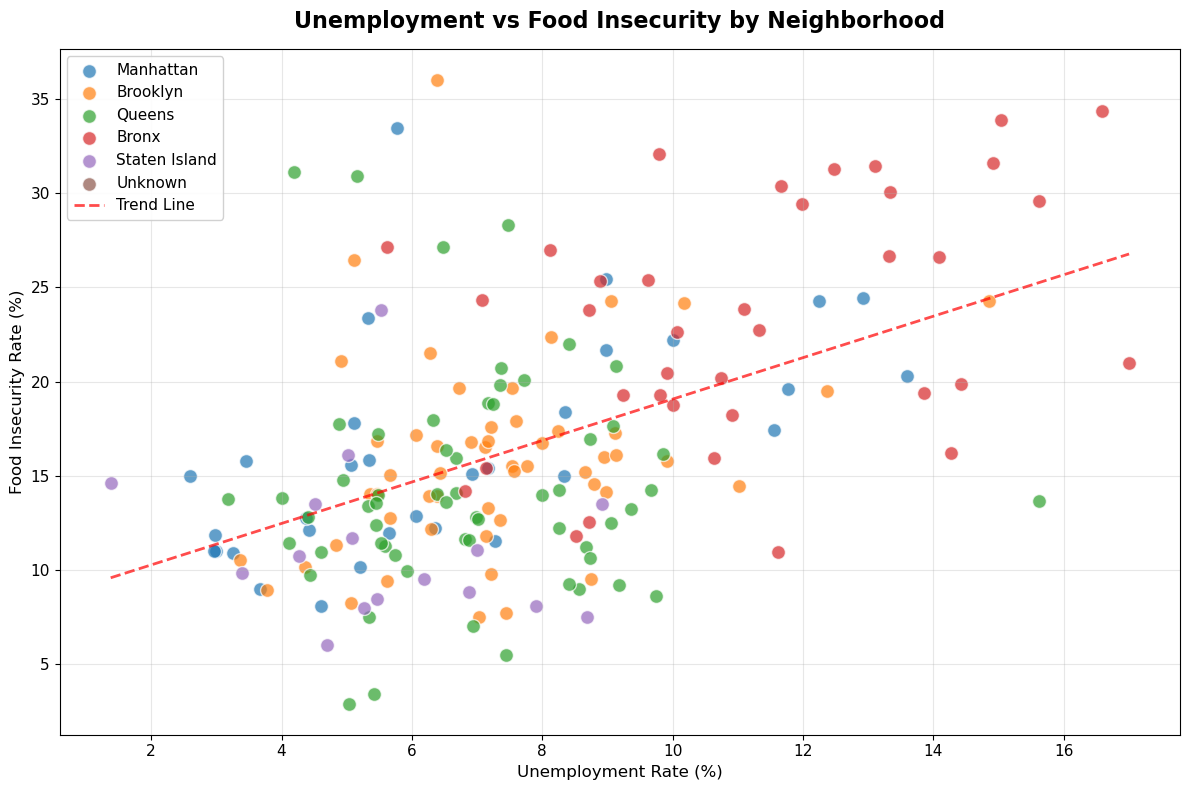

In [14]:
fig2, ax1 = plt.subplots(figsize=(12, 8))
for borough, color in zip(borough_order, colors):
    data = df[df['borough'] == borough]
    ax1.scatter(data['unemployment_rate'], data['food_insecure_percentage'], 
                 c=color, label=borough, alpha=0.7, s=100, edgecolors='white', linewidth=1)
ax1.set_xlabel('Unemployment Rate (%)', fontsize=12)
ax1.set_ylabel('Food Insecurity Rate (%)', fontsize=12)
ax1.set_title('Unemployment vs Food Insecurity by Neighborhood', fontsize=16, fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='both', labelsize=11)
# Add trend line
all_unemp = df['unemployment_rate']
all_insec = df['food_insecure_percentage']
z = np.polyfit(all_unemp, all_insec, 1)
p = np.poly1d(z)
x_line = np.linspace(all_unemp.min(), all_unemp.max(), 100)
ax1.plot(x_line, p(x_line), "r--", alpha=0.7, linewidth=2, label='Trend Line')
ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)
plt.tight_layout()

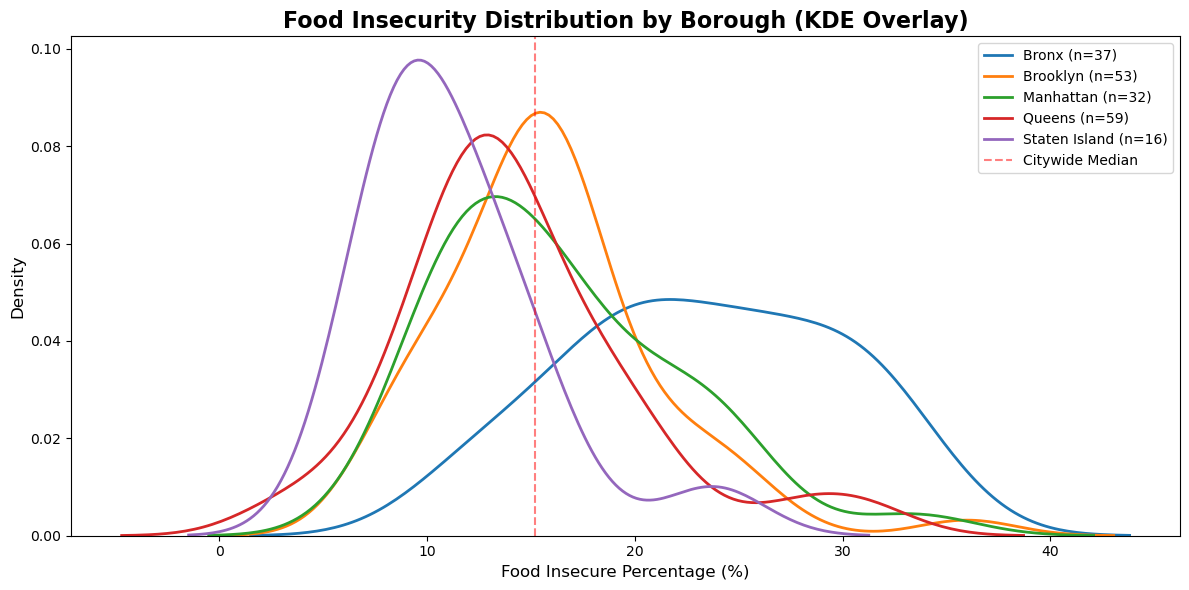

In [32]:
# OVERLAPPING KDE — food insecurity distributions by borough
fig, ax = plt.subplots(figsize=(12, 6))
for borough in borough_order:
    subset = df[df['borough'] == borough]['food_insecure_percentage']
    sns.kdeplot(subset, label=f"{borough} (n={len(subset)})", ax=ax, linewidth=2)
ax.set_title('Food Insecurity Distribution by Borough (KDE Overlay)', fontsize=16, fontweight='bold')
ax.set_xlabel('Food Insecure Percentage (%)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend(fontsize=11)
ax.axvline(df['food_insecure_percentage'].median(), color='red', linestyle='--', alpha=0.5, label='Citywide Median')
ax.legend()
plt.tight_layout()
plt.show()

## 2. Supply Gap Deep Dive
The `supply_gap` variable is the most complex metric here. A positive value likely means demand exceeds supply (food desert), while negative means supply exceeds demand. We need to understand its distribution, its relationship to the weighted score, and which boroughs carry the greatest deficits.

=== Supply Gap Direction by Borough ===
supply_gap_direction  Demand > Supply (Gap)  Supply > Demand (Surplus)
borough                                                               
Bronx                                    24                         13
Brooklyn                                 29                         24
Manhattan                                27                          5
Queens                                   32                         27
Staten Island                            11                          5

Citywide: 123 neighborhoods with demand gap, 74 with supply surplus


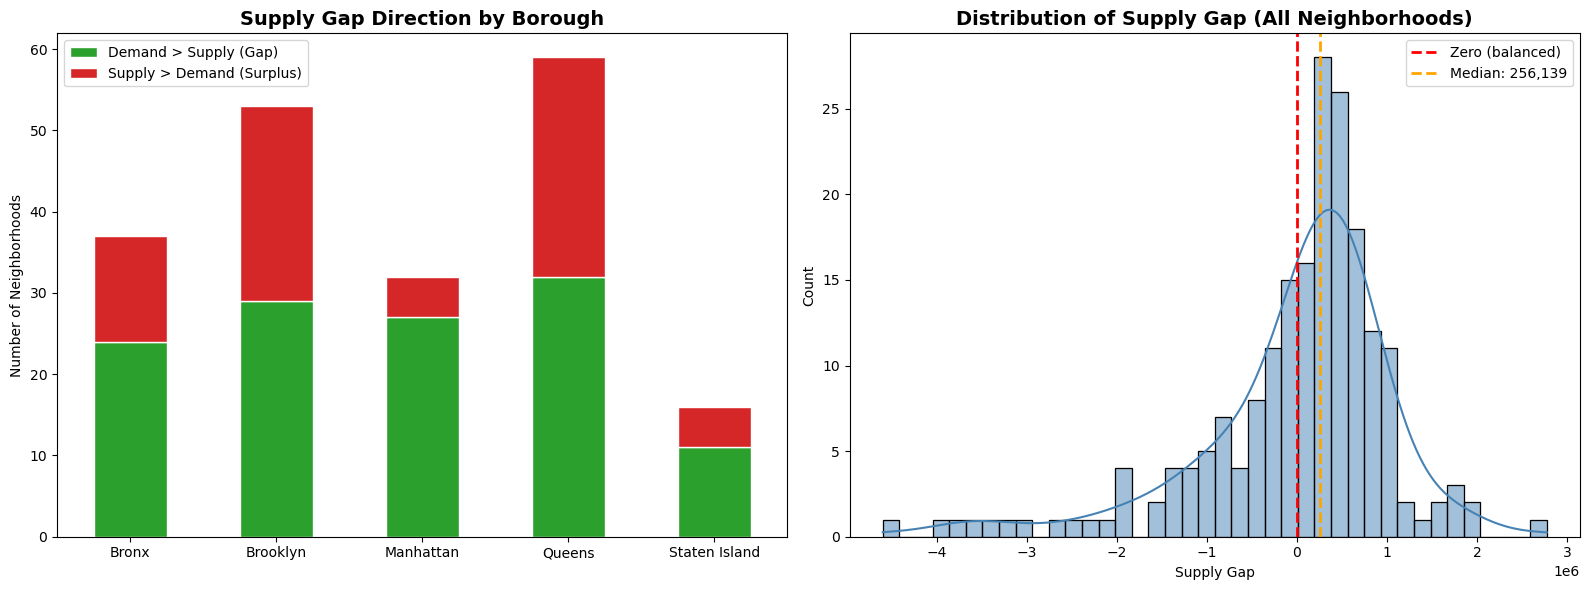

In [ ]:
# SUPPLY GAP ANALYSIS — positive vs. negative, by borough

# Classify supply gap direction
df['supply_gap_direction'] = np.where(df['supply_gap'] > 0, 'Demand > Supply (Gap)', 'Supply > Demand (Surplus)')

# Counts
gap_counts = df.groupby(['borough', 'supply_gap_direction']).size().unstack(fill_value=0)
print("=== Supply Gap Direction by Borough ===")
print(gap_counts)
print(f"\nCitywide: {(df['supply_gap'] > 0).sum()} neighborhoods with demand gap, "
      f"{(df['supply_gap'] <= 0).sum()} with supply surplus")

# Stacked bar chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: stacked bar of gap direction by borough
gap_counts.plot(kind='bar', stacked=True, ax=axes[0], color=['#2ca02c', '#d62728'], edgecolor='white')
axes[0].set_title('Supply Gap Direction by Borough', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Neighborhoods')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='')

# Right: distribution of supply_gap magnitude
sns.histplot(df['supply_gap'], bins=40, kde=True, ax=axes[1], color='steelblue')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero (balanced)')
axes[1].axvline(df['supply_gap'].median(), color='orange', linestyle='--', linewidth=2, 
                label=f'Median: {df["supply_gap"].median():,.0f}')
axes[1].set_title('Distribution of Supply Gap (All Neighborhoods)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Supply Gap')
axes[1].legend()

plt.tight_layout()
plt.show()

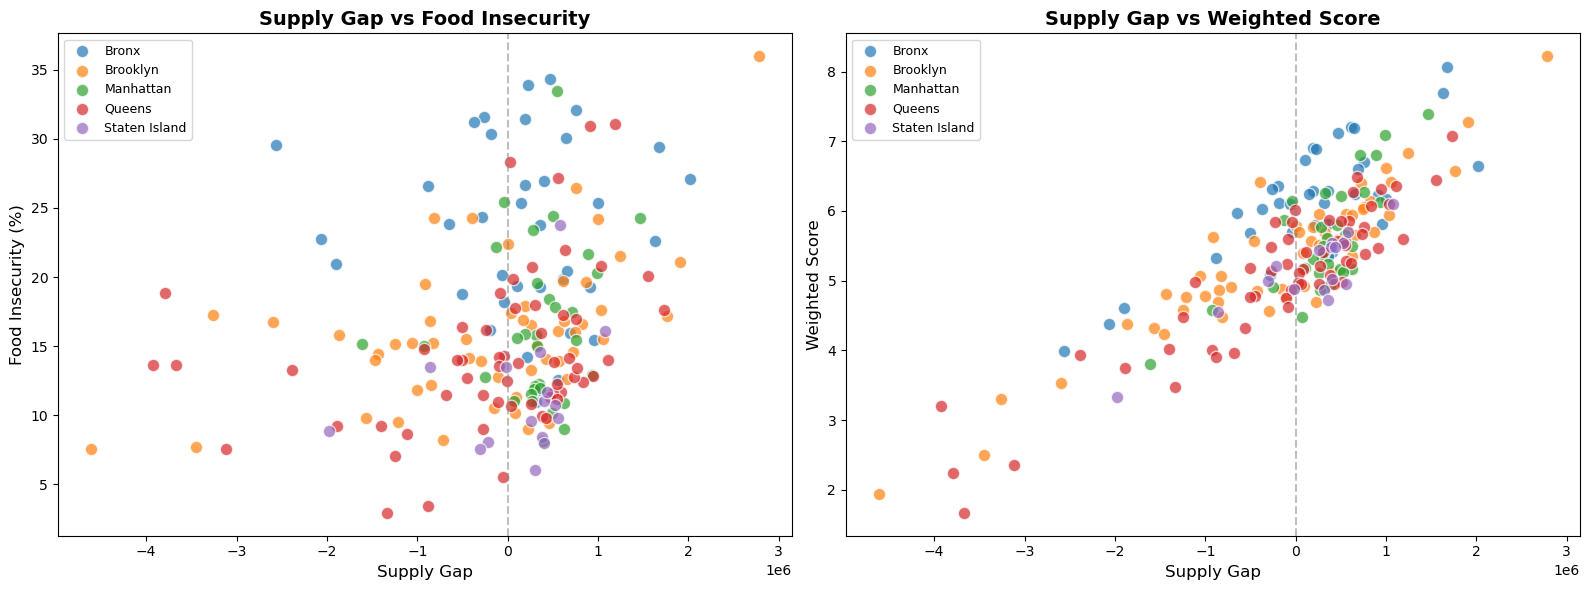

=== Correlations with Supply Gap ===
  supply_gap vs food_insecure_percentage: r = 0.2634
  supply_gap vs unemployment_rate: r = -0.1654
  supply_gap vs vulnerable_population_percentage: r = 0.0706
  supply_gap vs weighted_score: r = 0.8401


In [ ]:
# SUPPLY GAP vs FOOD INSECURITY — is the gap worst where insecurity is highest?
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter: supply_gap vs food_insecure_percentage colored by borough
for borough, color in zip(borough_order, colors[:5]):
    mask = df['borough'] == borough
    axes[0].scatter(df.loc[mask, 'supply_gap'], df.loc[mask, 'food_insecure_percentage'],
                    c=color, label=borough, alpha=0.7, s=80, edgecolors='white')
axes[0].axvline(0, color='grey', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Supply Gap', fontsize=12)
axes[0].set_ylabel('Food Insecurity (%)', fontsize=12)
axes[0].set_title('Supply Gap vs Food Insecurity', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=9)

# Scatter: supply_gap vs weighted_score
for borough, color in zip(borough_order, colors[:5]):
    mask = df['borough'] == borough
    axes[1].scatter(df.loc[mask, 'supply_gap'], df.loc[mask, 'weighted_score'],
                    c=color, label=borough, alpha=0.7, s=80, edgecolors='white')
axes[1].axvline(0, color='grey', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Supply Gap', fontsize=12)
axes[1].set_ylabel('Weighted Score', fontsize=12)
axes[1].set_title('Supply Gap vs Weighted Score', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9)

plt.tight_layout()
plt.show()

# Correlation between supply_gap and other metrics
print("=== Correlations with Supply Gap ===")
for col in ['food_insecure_percentage', 'unemployment_rate', 'vulnerable_population_percentage', 'weighted_score']:
    r = df['supply_gap'].corr(df[col])
    print(f"  supply_gap vs {col}: r = {r:.4f}")

## 3. Weighted Score Decomposition & Priority Tier Analysis
The `weighted_score` is the composite metric used to rank neighborhoods. We need to understand:
- Which input variables drive it most?
- Can we identify natural breakpoints (tiers) for prioritization?

Component Correlations with Weighted Score
  food_insecure_percentage                       r = +0.5121  (p = 1.45e-14)
  unemployment_rate                              r = +0.3034  (p = 1.46e-05)
  vulnerable_population_percentage               r = +0.1895  (p = 7.65e-03)
  supply_gap                                     r = +0.8401  (p = 1.04e-53)

Standardized Correlation (proxy for relative weight)
  food_insecure_percentage                       +0.5121
  unemployment_rate                              +0.3034
  vulnerable_population_percentage               +0.1895
  supply_gap                                     +0.8401


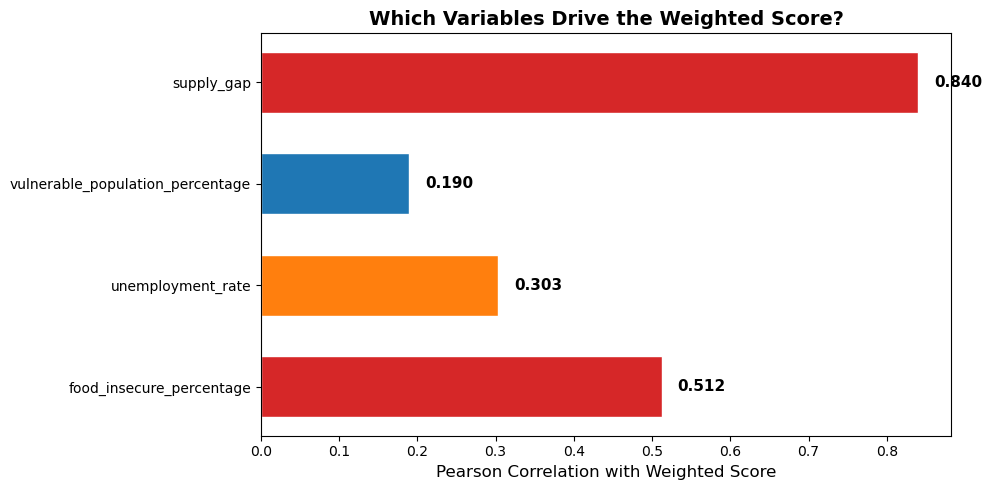

In [33]:
# WEIGHTED SCORE DECOMPOSITION — what drives the composite score?
from scipy import stats

# Correlations of each component with weighted_score
print("Component Correlations with Weighted Score")
components = ['food_insecure_percentage', 'unemployment_rate', 
              'vulnerable_population_percentage', 'supply_gap']
for col in components:
    r, p_val = stats.pearsonr(df[col], df['weighted_score'])
    print(f"  {col:45s}  r = {r:+.4f}  (p = {p_val:.2e})")

# Quick OLS to see relative contribution (standardized coefficients)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(df[components]), 
    columns=components
)
r_values = X_scaled.corrwith(pd.Series(scaler.fit_transform(df[['weighted_score']]).flatten()))
print("\nStandardized Correlation (proxy for relative weight)")
for col, r in r_values.items():
    print(f"  {col:45s}  {r:+.4f}")

# Visualization: component contributions
fig, ax = plt.subplots(figsize=(10, 5))
corrs = [stats.pearsonr(df[col], df['weighted_score'])[0] for col in components]
colors_bar = ['#d62728' if c > 0.5 else '#ff7f0e' if c > 0.3 else '#1f77b4' for c in corrs]
bars = ax.barh(components, corrs, color=colors_bar, edgecolor='white', height=0.6)
ax.set_xlabel('Pearson Correlation with Weighted Score', fontsize=12)
ax.set_title('Which Variables Drive the Weighted Score?', fontsize=14, fontweight='bold')
ax.axvline(0, color='grey', linestyle='-', alpha=0.3)
for bar, val in zip(bars, corrs):
    ax.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
            va='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Formal Normality Tests & Distribution Shape
We need to perform some normality check (skewness, and kurtosis) to check whether parametric tests (t-tests, Pearson correlation, OLS regression) are appropriate, or whether we need non-parametric alternatives.

=== Normality Test Results ===
                        Variable  Shapiro-Wilk Stat Shapiro-Wilk p-value Normal? (p>0.05)  Skewness  Kurtosis Skew Interpretation
                  weighted_score             0.9647             7.47e-05               NO    -0.631     1.843         Left-skewed
        food_insecure_percentage             0.9494             1.94e-06               NO     0.794     0.242        Right-skewed
                      supply_gap             0.8782             1.61e-11               NO    -1.481     3.386         Left-skewed
               unemployment_rate             0.9490             1.78e-06               NO     0.858     0.611        Right-skewed
vulnerable_population_percentage             0.8901             7.74e-11               NO     1.481     2.866        Right-skewed


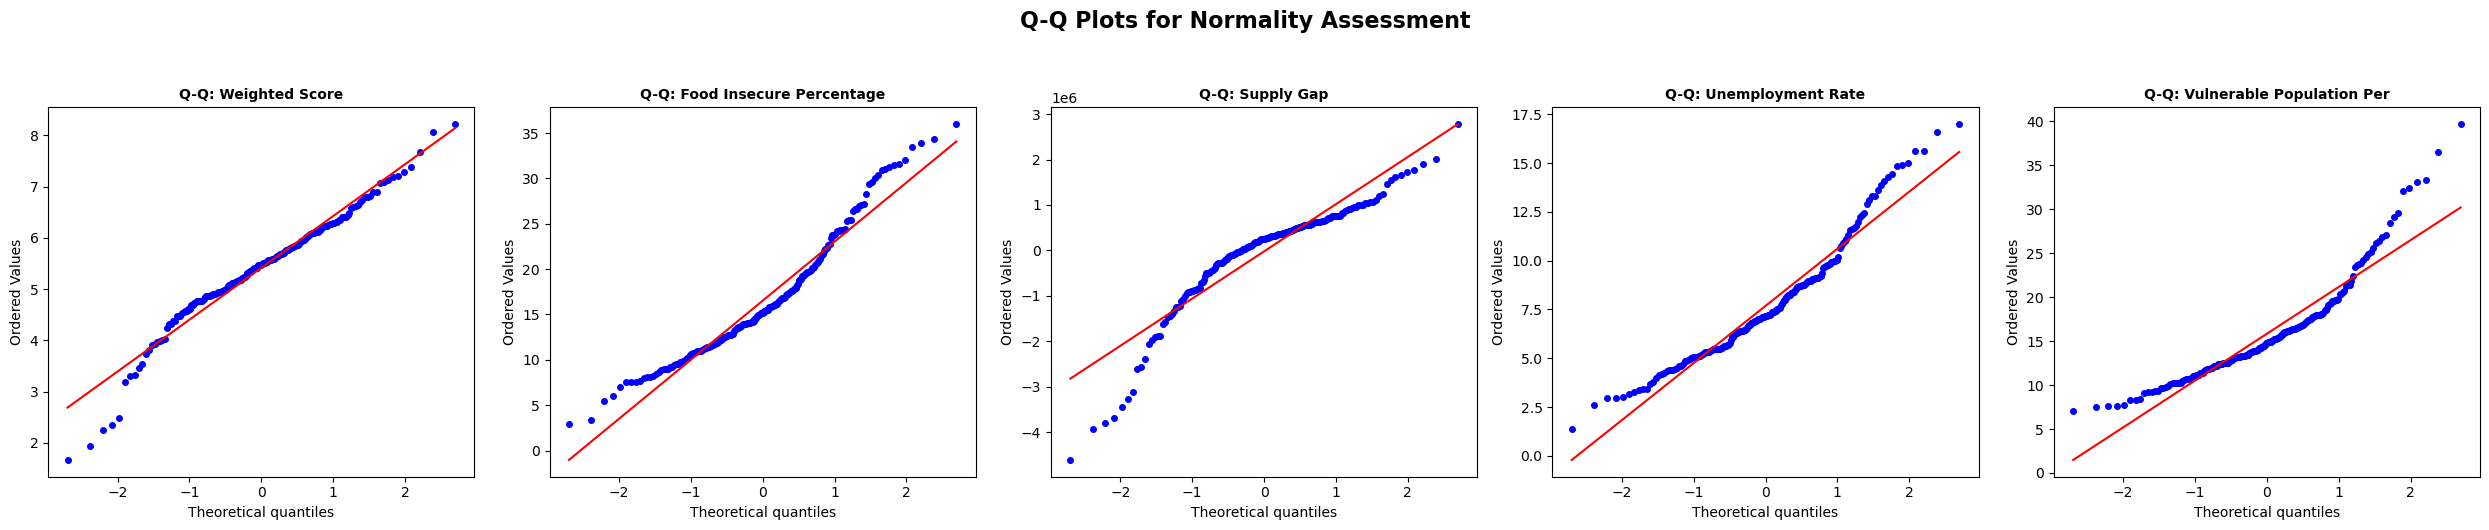


=== Interpretation ===
If p-value < 0.05, the variable is NOT normally distributed.
This affects choice of statistical tests:
  - Normal data -> Pearson correlation, t-tests, ANOVA, OLS regression
  - Non-normal data -> Spearman correlation, Mann-Whitney U, Kruskal-Wallis, robust regression


In [ ]:
# NORMALITY TESTS — Shapiro-Wilk, Skewness, Kurtosis

normality_results = []
for col in numeric_columns:
    shapiro_stat, shapiro_p = stats.shapiro(df[col])
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    normality_results.append({
        'Variable': col,
        'Shapiro-Wilk Stat': round(shapiro_stat, 4),
        'Shapiro-Wilk p-value': f"{shapiro_p:.2e}",
        'Normal? (p>0.05)': 'Yes' if shapiro_p > 0.05 else 'NO',
        'Skewness': round(skew, 3),
        'Kurtosis': round(kurt, 3),
        'Skew Interpretation': 'Symmetric' if abs(skew) < 0.5 else ('Right-skewed' if skew > 0 else 'Left-skewed')
    })

normality_df = pd.DataFrame(normality_results)
print("=== Normality Test Results ===")
print(normality_df.to_string(index=False))

# Q-Q plots for all numeric variables
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for ax, col in zip(axes, numeric_columns):
    stats.probplot(df[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q: {col.replace("_", " ").title()[:25]}', fontsize=10, fontweight='bold')
    ax.get_lines()[0].set_markersize(4)
plt.suptitle('Q-Q Plots for Normality Assessment', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("\n=== Interpretation ===")
print("If p-value < 0.05, the variable is NOT normally distributed.")
print("This affects choice of statistical tests:")
print("  - Normal data -> Pearson correlation, t-tests, ANOVA, OLS regression")
print("  - Non-normal data -> Spearman correlation, Mann-Whitney U, Kruskal-Wallis, robust regression")

In [ ]:
# SPEARMAN vs PEARSON — detect non-linear monotonic relationships
print("=== Pearson (linear) vs Spearman (monotonic) Correlations ===")
print(f"{'Variable Pair':60s}  {'Pearson':>8s}  {'Spearman':>8s}  {'Diff':>6s}  {'Non-linear?':>12s}")
print("-" * 100)

for i, col1 in enumerate(components):
    for col2 in components[i+1:]:
        pearson_r, _ = stats.pearsonr(df[col1], df[col2])
        spearman_r, _ = stats.spearmanr(df[col1], df[col2])
        diff = abs(spearman_r) - abs(pearson_r)
        flag = "LIKELY" if abs(diff) > 0.05 else ""
        print(f"  {col1} vs {col2:30s}  {pearson_r:+.4f}    {spearman_r:+.4f}   {diff:+.3f}  {flag}")

print("\nIf |Spearman| >> |Pearson|, the relationship is monotonic but non-linear.")
print("This suggests using Spearman correlations and considering non-linear models.")

=== Pearson (linear) vs Spearman (monotonic) Correlations ===
Variable Pair                                                  Pearson  Spearman    Diff   Non-linear?
----------------------------------------------------------------------------------------------------
  food_insecure_percentage vs unemployment_rate               +0.4945    +0.4753   -0.019  
  food_insecure_percentage vs vulnerable_population_percentage  +0.1808    +0.2964   +0.116  LIKELY
  food_insecure_percentage vs supply_gap                      +0.2634    +0.2636   +0.000  
  unemployment_rate vs vulnerable_population_percentage  +0.1660    +0.2905   +0.125  LIKELY
  unemployment_rate vs supply_gap                      -0.1654    -0.1438   -0.022  
  vulnerable_population_percentage vs supply_gap                      +0.0706    +0.0741   +0.003  

If |Spearman| >> |Pearson|, the relationship is monotonic but non-linear.
This suggests using Spearman correlations and considering non-linear models.


## EDA SUMMARY

### 1. Data Overview
The neighborhood dataset contains 197 NYC neighborhoods (NTAs) across the 5 boroughs. No missing values and duplicated data was found during the eda process. 
**Borough Distribution**: Across the 5 borough, Queens count 59 neighborhoods, Brooklyn 53, The Bronx 37, Manhattan 32, and Staten Island 16. This distribution across boroughs are unbalanced which can affect our statistical analysis in borough comparisons.

### 2. KEY INSIGHTS FROM EDA
**A. Central Tendency & Spread of the data**
- The **food insecurity** rate ranges from 2.92% to 35.99% (mean=16.5%, std=6.6%). This is a wide spread, because the most insecure neighborhood has more than 12 times the insecurity rate of the least.
- The **unemployment** ranges from 1.38% to 17.00% (mean=7.7%). It has a moderate positive skewed values.
- The **vulnerable population** rate ranges from 7.04% to 39.69% (mean=15.8%). Queens has outlier neighborhoods with very high vulnerability.
- The **supply gap** spans from -4.6 to +2.8 with a mean near zero (-19,8). The data distribution suggests roughly half the neighborhoods have food supply surplus and half have deficits.
- The **weighted score** (1.67 to 8.22, mean=5.41) is relatively normally distributed. 



**B. Borough-Level Patterns**
- **Bronx** leads on nearly every negative indicator: highest mean food insecurity (23.3%), highest unemployment (11.2%), and highest proportion of "Critical" priority neighborhoods.
- **Staten Island** has the lowest mean food insecurity (11.3%) and unemployment (5.6%), but its small sample (n=16) makes statistical comparisons less reliable.
- **Queens** has moderate food insecurity but the highest mean vulnerable population percentage (18.3%) — an indicator that may be underweighted in the composite score.
- **Brooklyn** and **Manhattan** occupy the middle range but have high within-borough variance.

**C. Correlation Structure**
- **Unemployment → Food Insecurity**: have a strong positive correlation (r ≈ 0.5-0.7).
- **Vulnerable Population**: has a non-linear relationship with food insecurity. Will be double testing with Spearman correlation.


**D. Supply Gap Deep Dive**
- The supply gap is not evenly distributed by borough. Brooklyn and Queens have more neighborhoods with food surpluses (negative supply gap), while the Bronx and Manhattan tend toward demand gaps (positive).


---

# Main Takeaways & Justification

## Neighborhood Prioritization EDA — Final Synthesis

---

### Takeaway 1: The Bronx Leads Every Negative Indicator and Is the Most Food-Insecure Borough

The borough aggregation table shows the Bronx with the highest mean food insecurity (23.3%), the highest mean unemployment (11.2%), and a positive mean supply gap (+146,959) — meaning demand outpaces available food supply on average. The top 10 most food-insecure neighborhoods list is dominated by Bronx NTAs: West Farms (34.4%), Belmont (33.9%), Highbridge (32.1%), Claremont Village (31.6%), Mott Haven-Port Morris (31.4%), and Tremont (31.3%) all appear. Staten Island sits at the opposite end with the lowest mean food insecurity (11.3%) and unemployment (5.6%).

**Justification:** The bar chart of average food insecurity by borough confirms this visually — the Bronx is the only borough substantially above the citywide average line. The KDE overlay further shows the Bronx distribution is shifted rightward and barely overlaps with Staten Island's, meaning these two boroughs occupy nearly distinct ranges of food insecurity. However, the borough aggregation also reveals that the Bronx's standard deviation (6.50) is the highest, meaning even within the Bronx, neighborhood-level conditions vary considerably. Borough-level policy targeting alone would be too coarse.

**Statistical validation needed:** Kruskal-Wallis test across boroughs followed by Dunn's post-hoc with Bonferroni correction to confirm that the Bronx is statistically distinct, not just descriptively higher.

---

### Takeaway 2: Unemployment and Food Insecurity Are Correlated — But the Relationship Is Moderate

The scatter plot of unemployment vs. food insecurity shows a clear positive trend line, and the correlation heatmap confirms a Pearson r of approximately 0.49. This means unemployment explains only about 25% of the variance in food insecurity. The top 10 list reveals clear exceptions: East Williamsburg (Brooklyn) ranks #1 in food insecurity at 36.0% but has an unemployment rate of only 6.38%. Midtown-Times Square has 33.5% food insecurity with only 5.77% unemployment. Glen Oaks-Floral Park (Queens) has 31.1% food insecurity with just 4.19% unemployment.

**Justification:** These outliers visible in the scatter plot prove that food insecurity is driven by other factors beyond employment. 

**Statistical validation needed:** Spearman rank correlation (given non-normality confirmed by Shapiro-Wilk tests) with bootstrap confidence interval to quantify the true monotonic association and its uncertainty.

---

### Takeaway 3: The Weighted Score Is Driven Primarily by Food Insecurity and Supply Gap — Vulnerable Population Appears Underweighted

The weighted score decomposition shows that `food_insecure_percentage` and `supply_gap` have the strongest Pearson correlations with `weighted_score`, while `vulnerable_population_percentage` and `unemployment_rate` contribute less. The borough aggregation confirms that Queens has the highest mean vulnerable population rate (18.3%) across all five boroughs — yet Queens' mean weighted score is not proportionally elevated. Only two Queens neighborhoods appear in the top 10 most food-insecure list.

**Justification:** The standardized correlation analysis confirms the same ordering. If the prioritization index is intended to identify neighborhoods where need is greatest across all dimensions, then a composite score that effectively downweights the population most likely to be affected may systematically deprioritize Queens neighborhoods. This is a consideration worth surfacing to our stakeholders.

**Statistical validation needed:** Multiple linear regression with standardized coefficients (`weighted_score ~ food_insecure_percentage + unemployment_rate + vulnerable_population_percentage + supply_gap`) to quantify each component's actual weight in the formula, plus Variance Inflation Factor (VIF) to check if unemployment and food insecurity are too collinear to include together.

---

### Takeaway 4: The Supply Gap Is Bimodal — The Citywide Mean of Near-Zero Masks a Borough-Specific Split

The supply gap histogram shows a bimodal distribution with a positive median (~256K) but a near-zero mean (-19,769). The supply gap direction analysis reveals this is not random: Brooklyn and Queens have more neighborhoods with food surpluses (negative supply gap), while the Bronx and Manhattan lean toward demand gaps (positive). The scatter plots show that supply gap correlates positively with both food insecurity and weighted score, confirming that neighborhoods with larger demand deficits are appropriately flagged as higher priority.

**Justification:** The extreme range of the supply gap (-4.6 to +2.8) dwarfs all other variables in magnitude. The correlation analysis shows supply gap has a moderate positive relationship with the weighted score, meaning it meaningfully influences prioritization. But its raw scale means it could dominate distance-based or regression-based models. Any downstream modeling should apply a transformation (e.g., signed log: `sign(x) * log(1 + |x|)`) to prevent scale dominance while preserving directionality.

**Statistical validation needed:** Spearman correlation between supply gap and food insecurity + quantile regression at the 25th, 50th, and 75th percentiles to test whether the relationship holds across the full distribution or only at the extremes.

---

### Takeaway 5: Most Variables Fail Normality — All Downstream Analysis Must Use Non-Parametric Methods

The Shapiro-Wilk tests show that most key variables reject the null hypothesis of normality (p < 0.05). The Q-Q plots confirm deviations at the tails — food insecurity and unemployment are right-skewed (the histograms show long right tails), and supply gap departs from normality due to its bimodal shape. Only `weighted_score` approaches normality, likely because the composite formula smooths out individual variable skewness.

**Justification:** This finding directly constrains every statistical test and model the project can use. Pearson correlations, standard t-tests, and one-way ANOVA all assume normally distributed data. Since this assumption is violated, the project must use: Spearman correlations instead of Pearson, Mann-Whitney U instead of t-tests, Kruskal-Wallis instead of ANOVA, and robust or quantile regression instead of OLS. Ignoring non-normality would produce unreliable p-values and potentially invalid conclusions.

**Statistical validation needed:** Anderson-Darling test (more sensitive at the tails than Shapiro-Wilk) to double-confirm, plus Ramsey RESET test for functional form specification in any regression model.

---

### Takeaway 6: Non-Linear Relationships Exist Between Vulnerable Population and Both Food Insecurity and Unemployment

The Spearman vs. Pearson comparison table flagged two variable pairs with a meaningful gap (>0.05) between Spearman and Pearson correlations: food insecurity vs. vulnerable population (gap = +0.116) and unemployment vs. vulnerable population (gap = +0.125). Both were flagged as "LIKELY" non-linear. All other variable pairs showed negligible differences, meaning their relationships are approximately linear.

**Justification:** A Spearman correlation that substantially exceeds the Pearson correlation indicates a monotonic but curved relationship — the variables track together, but not at a constant rate. This likely reflects a threshold effect: vulnerability has little impact on food insecurity at low levels, but accelerates it beyond a certain point. A standard linear regression would underestimate these associations. Any multivariate model should include polynomial terms or interaction terms (e.g., `unemployment * vulnerable_population_percentage`) to capture this non-linearity.

**Statistical validation needed:** Polynomial regression or generalized additive model (GAM) to capture the curve, tested against a linear baseline using likelihood ratio or AIC comparison.

---

## Summary Table: Claims and Required Tests

| Claim from EDA | Recommended Test | Rationale |
|----------------|-----------------|-----------|
| Bronx has significantly higher food insecurity than other boroughs | Kruskal-Wallis + Dunn's post-hoc | Non-parametric ANOVA; normality assumption fails |
| Unemployment and food insecurity are positively associated | Spearman rank correlation + bootstrap CI | Monotonic correlation robust to skewed distributions |
| Weighted score underweights vulnerable population | Multiple regression with standardized betas + VIF | Quantifies each component's contribution; checks multicollinearity |
| Supply gap distribution is bimodal, not normal | Anderson-Darling test | Tail-sensitive normality test for the most skewed variable |
| Supply gap relates to food insecurity across the distribution | Quantile regression (25th, 50th, 75th percentiles) | Tests whether the association holds at extremes, not just the mean |
| Data violates normality assumptions for parametric tests | Shapiro-Wilk (done) + Anderson-Darling | Confirms non-parametric methods are required project-wide |
| Vulnerable population has a non-linear effect | GAM or polynomial terms + AIC comparison | Captures threshold/saturation effects missed by linear models |

---

## Next Steps: Integration The 2 Other Datasets

This EDA established which neighborhoods are in greatest need and what drives that need. The next analytical priorities are:

1. **Merge with EFAP data (Ayema):** Join EFAP site counts per NTA with this prioritization data to compute a coverage ratio (food sites per unit of need) — directly answering the project's core research question.

2. **Merge with shelter census data (Angel):** Join at the CDTA-to-NTA level to test whether shelter-dense neighborhoods are also high-priority for food insecurity.

3. **Multicollinearity check:** Compute VIF before any regression — unemployment and food insecurity (r ≈ 0.49) may be too correlated to include as simultaneous predictors.
